## TSF GRIP April'21
### Technical Task 1: Prediction using Supervised ML

To predict the score of a student based on the number of hours he/she studied
### Author: Apoorva Khairnar

#### Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#### Step 2: Loading given dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Step 3: Visualizing given data

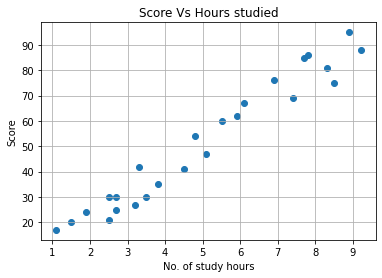

In [4]:
# Defining the dependent and independent variables
X = df.loc[:, :"Hours"].values
Y = df.loc[:, "Scores"].values
# Plotting the data
plt.scatter(X, Y)
plt.title("Score Vs Hours studied")
plt.xlabel("No. of study hours")
plt.ylabel("Score")
plt.grid()
plt.show()

#### Step 4: Training the ML algorithm

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [6]:
# Deriving the relationship between the variables
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [7]:
line = reg.coef_ * X + reg.intercept_

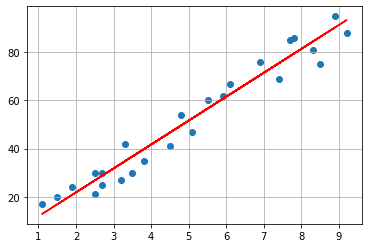

In [8]:
# Visualizing the result
plt.scatter(X, Y)
plt.plot(X, line, color='Red')
plt.grid()
plt.show()

#### Step 5: Making predictions

In [9]:
pred = reg.predict(X_test)
df1 = pd.DataFrame({"True":Y_test, "Predicted":pred, "Absolute Error":abs((Y_test-pred)*100/Y_test)})
df1

,True,Predicted,Absolute Error
0,20,16.844722,15.776391
1,27,33.745575,24.983611
2,69,75.500624,9.421194
3,30,26.786400,10.712000
4,62,60.588106,2.277248
5,35,39.710582,13.458806
6,24,20.821393,13.244195


In [10]:
df['Predicted'] = reg.predict(X)
df.head()

,Hours,Scores,Predicted
0,2.5,21,26.786400
1,5.1,47,52.634764
2,3.2,27,33.745575
3,8.5,75,86.436470
4,3.5,30,36.728078


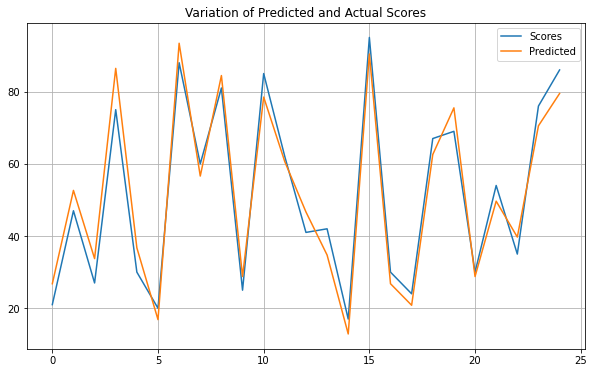

In [11]:
df.plot(y=['Scores', 'Predicted'], kind='line', figsize=(10, 6))
plt.title('Variation of Predicted and Actual Scores')
plt.grid()
plt.show()

In [12]:
# Predicting Y for given X value
h = [[9.25]]
custom_pred = reg.predict(h)
print("No of Hours = {}".format(h[0][0]))
print("Predicted Score = {}".format(custom_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


#### Step 6: Evaluating the model

In [13]:
# Error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
